#**Tech Together Atlanta Workshop - Intro to ML 🤖🌸**




# Intro
Now that we've learned a bit about machine learning and a building block machine learning algorithm, the perceptron, let's put our knowledge to the test and code the perceptron from scratch! 🧠⚡

A bit of background on the different languages and libraries you'll see throughout this workshop: 

- 🐍 Python: a programming language typically used for machine learning applications 

- 🔢 numpy: Python library which allows for mathematical manipulation of arrays and matrices

- 🐼 Pandas: Python library used for data manipulation and analysis- really useful for manipualting numerical tables 

- 📜 Colab: the IDE (integrated development environment) you're writing your code in! Saves to your google drive and doesn't require a physical GPU -  another  super common alternative in Jupyter notebooks, which you can read about more [here](https://jupyter.org/)! 

# Coding the Perceptron





---


Recall that the perceptron works as follows:

For a point with coordinates (p,q), label y, and prediction given by the equation:

 image.png




- If the point is correctly classified, do nothing.

- If the point is classified positive, but it has a negative label, subtract ap, aq and a from w1, w2 and b respectively
- If the point is classified negative, but it has a positive label, add ap, aq, and a to w1, w2 and b respectively


---



### What kind of data do we want to define (eg. our variables)?



```
X = data, y = labels, W = weights (array), b = bias, learn_rate
```



### What are the components of the perceptron that we should consider?





```
- step function [purpose: gives the point a value of 1 or 0 based on what the y-hat function from above outputs]
- prediction function [ purpose: outputs the predicted value, y-hat]
- perceptron function [ purpose: the logic behind the algorithm]
```



1. perceptron algorithm 

In [40]:
def perceptron(X, y, W, b, learn_rate = 0.06):
    y_hat = prediction(X,W,b) # returns predicted value
    
    if y - y_hat == 1:        # point classified negative but has positive label, label actually 1 but prediction 0
        W += X * learn_rate   # add learning rate * x value
        b += learn_rate       # add learning rate
    elif y - y_hat == -1:     # point classified positive but has negative label, label actually 0 but prediction 1
        W -= X * learn_rate   # subtract learning rate * x value
        b -= learn_rate       # subtract learning rate
    
    return W, b

2. prediction function

In [41]:
def prediction(X, W, b):
    return step((np.matmul(X,W)+b)) 

3. step function

In [42]:
def step(t):          # if the value of the step function is greater than 0 then it's 'positive', return 1.
    if t >= 0:
        return 1
    else:             # if the value of the step function is less than 0 then it's 'negative', return 0.
        return 0

Now that we've coded our perceptron from scratch, let's test it out on a real dataset!

# Importing our data set
in order to be able to test our our perceptron algorithm, we're going to need to add in some data. We're going to be using the popular iris dataset for this workshop. This dataset serves as a staple for testing the effectiveness of various ML algorithms.

[more about the set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Let's take a peek inside the dataset to get a better understanding of the data we're working with!


In [43]:
import pandas as pd  # import the pandas library so we can use its functions
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) # converting csv file into dataframe (a special pandas table) that will allow us to easily manipulate our data
df.head() #let's take a look at the first 5 rows of our dataframe

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Syntax: df.iloc returns (index, value(s)) list, where: 
# (1) the 0:100 means "Get the first 100 data frame entries, and 
# (2) the 4 means "only the (zero-indexed) 4th column of those entries, specifically. 
# (3) .values means we only return the values, not their original indices. 
y = df.iloc[0:100, 4].values

y = np.where(y == 'Iris-setosa', 0, 1) # need to create the labels that we had above! (1 for Versicolor and 0 for Setosa flowers)
print(y)

X = df.iloc[0:100, [0, 2]].values      # extract feature column (sepal length), 3rd feature column (petal length) and assign to feature matrix X:
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.

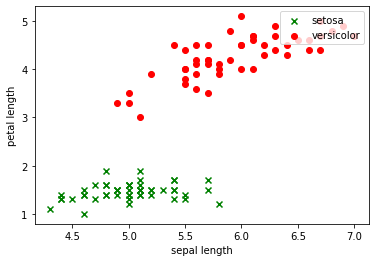

In [45]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()

**Before Training**

In [46]:
from sklearn.metrics import f1_score, precision_score, recall_score
W = np.random.rand(2) #2D
b = np.random.rand(1) #1D

y_pred = []
for data in X:
    y_pred.append(prediction(data, W, b))

recall_score(y, y_pred, average = 'micro')

0.5

Note: recall score
- metric for testing out how well a classifier did
  - out of all the flowers that were truly versicolor, how many did we label?
  - e.g, What proportion of actual positives was identified correctly?

**Let's Train our Model!**

In [47]:
W = np.random.rand(2) #2D
b = np.random.rand(1) #1D

for i in range(100):  # train on 100 epochs (basically run through the algorithm 100 times)
    for data, label in zip(X, y):
        W, b = perceptron(data, label, W, b, learn_rate = 0.001)
    
    y_pred = []       # y-hat array
    for data in X:
        y_pred.append(prediction(data, W, b))

    print(recall_score(y, y_pred, average = 'micro'))

0.5
0.5
0.5
0.57
0.98
0.99
0.99
0.99
0.99
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


**Scikit-Learn**

scikit-learn is a machine learning library for Python which contains pre-made machine learning algorithms so we don't have to build them from scratch every time we want to tackle an ML problem! 


[Documentation](https://scikit-learn.org/stable/)

Let's try using scikit-learn's built-in perceptron and see how effective it really is!

In [48]:
# using sci-learn's perceptron algorithm:

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
predictions = clf.predict(X)
recall_score(y, predictions, average = 'micro')

1.0



You may have noticed that the recall score for scikit-learn's built-in perceptron is really good! The reason why is that on top of the actual perceptron algorithm, scikit-learn's perceptron has a few other built in features to help it learn really well! Check out the documentation for more information: 

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

**And we're done the workshop! Congrats on building your first Machine Learning algorithm, the perceptron! 👏👏👏**